In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [309]:
# Annotations Dolly
annotations_dolly = pd.read_csv("../pipeline/argumentation-based/argumentation structure/dolly/train.csv", index_col='ID').reset_index()

# Annotations MARGOT
annotations_margot = pd.read_csv("../pipeline/argumentation-based/argumentation structure/margot/train.csv", index_col='ID').reset_index()

df_annotations = pd.merge(annotations_dolly, annotations_margot, how='inner', left_on='text', right_on='text', suffixes=('_dolly', '_margot')).set_index('ID_dolly')

In [310]:
df_annotations

,text,claim_dolly,evidence_dolly,structure_dolly,label_dolly,dataset_dolly,ID_margot,claim_margot,evidence_margot,structure_margot,label_margot,dataset_margot
ID_dolly,,,,,,,,,,,,
39998,peloton and leesa sleep have all given in to p...,"""The author claims that Sean Hannity has been ...","""the main evidence provided by the author in t...","claims:""The author claims that Sean Hannity ha...",FAKE,kaggle,39998,peloton has a link on amazon where users can r...,peloton and leesa sleep have all given in to p...,claims:peloton has a link on amazon where user...,FAKE,kaggle
22978,sally yates testimony before a congressional c...,"""The author argues that Sally Yates's testimon...","""The author of this article, Kyle Griffin, has...","claims:""The author argues that Sally Yates's t...",FAKE,kaggle,22978,<unk>,sally yates testimony before a congressional c...,claims:<unk>evidences:sally yates testimony be...,FAKE,kaggle
37963,corruption and socialism go hand in hand brazi...,"""the author argues that corruption and sociali...","""the author begins by explaining that brazil i...","claims:""the author argues that corruption and ...",FAKE,kaggle,37963,<unk>,it hasn t helped that the lower oil prices hav...,claims:<unk>evidences:it hasn t helped that th...,FAKE,kaggle
10828,right now the says up to 20 million people wil...,"""The author is correct to state that up to 20 ...","""The author states that up to 20 million peopl...","claims:""The author is correct to state that up...",FAKE,liar,10828,<unk>,right now the says up to 20 million people wil...,claims:<unk>evidences:right now the says up to...,FAKE,liar
10120,nearly 65 percent almost two thirds of all new...,"""The author is correct in stating that nearly ...","""The author states that nearly 65 percent almo...","claims:""The author is correct in stating that ...",REAL,liar,10120,<unk>,nearly 65 percent almost two thirds of all new...,claims:<unk>evidences:nearly 65 percent almost...,REAL,liar
...,...,...,...,...,...,...,...,...,...,...,...,...
37990,a short excerpt from cans upcoming documentary...,"""The author claims that in the upcoming docume...","""the author of this news article excerpt state...","claims:""The author claims that in the upcoming...",FAKE,kaggle,37990,<unk>,a short excerpt from cans upcoming documentary...,claims:<unk>evidences:a short excerpt from can...,FAKE,kaggle
1345,trumps supreme court list might reassure conse...,"""The author of the news article attempts to re...","""The article states that the move was seen as ...","claims:""The author of the news article attempt...",REAL,fake_real,1345,white house press secretary josh ernest said i...,trumps supreme court list might reassure conse...,claims:white house press secretary josh ernest...,REAL,fake_real
5843,faced with 1 dollars million in campaign debt ...,"""The author claims that Scott Walker is unload...","""The author argues that the governor is unload...","claims:""The author claims that Scott Walker is...",FAKE,liar,5843,<unk>,faced with 1 dollars million in campaign debt ...,claims:<unk>evidences:faced with 1 dollars mil...,FAKE,liar


In [312]:
# Only keep columns we need
df_annotations = df_annotations[['text', 'claim_margot', 'evidence_margot', 'claim_dolly', 'evidence_dolly', 'dataset_dolly', 'label_dolly']]
df_annotations.index.rename('ID', inplace=True)

# Remove options of <unk> (MARGOT)
df_annotations = df_annotations[df_annotations['claim_margot'] != '<unk>']
final_df_annotations = df_annotations[df_annotations['evidence_margot'] != '<unk>']

In [313]:
# Pick 5 random texts
sample = final_df_annotations.sample(10, random_state=42)

# Write out the preprocessed arugmentation-based for manual evaluation
sample.to_excel('manual.xlsx', index_label='ID')


In [370]:
temp = final_df_annotations[final_df_annotations['dataset_dolly'] == 'kaggle']
temp = temp[temp['text'].str.len() < 500]
print(temp.iloc[1]['evidence_dolly'])
# 
display(final_df_annotations[final_df_annotations.index == temp.iloc[1].name])


"Hillary Clinton in a recent interview stated that she would continue the Obama administration's efforts to shut down the coal industry, stating that the coal industry was not "real" anymore and that the jobs that were dependent on it were not "real" jobs.  This is clearly a political attack, as she has long supported the coal industry and the associated jobs.  However, she is correct in that the coal industry is not what it once was, and her attempt to eliminate it entirely would result in more severe job losses in the region.  As of now, she is the Democratic candidate for president, and the republican candidate, Donald Trump, has expressed similar views on the coal industry, so it is likely that the coal industry will continue to decline under either candidate."


,text,claim_margot,evidence_margot,claim_dolly,evidence_dolly,dataset_dolly,label_dolly
ID,,,,,,,
38045,west virginia has been devastated by a loss of...,if hillary clinton is elected we can see a con...,heres what she said a few weeks ago about the ...,"""Hillary Clinton said that she would continue ...","""Hillary Clinton in a recent interview stated ...",kaggle,FAKE


In [373]:
temp = final_df_annotations[final_df_annotations['dataset_dolly'] == 'liar']
print(temp.iloc[5]['evidence_dolly'])
# 
display(final_df_annotations[final_df_annotations.index == temp.iloc[1].name])


"The author presents evidence from the news article that whenever you buy an airline ticket the federal government runs a background check on you. The author claims this is evidence of the government's involvement in air travel."


,text,claim_margot,evidence_margot,claim_dolly,evidence_dolly,dataset_dolly,label_dolly
ID,,,,,,,
12658,even after obamacare is fully implemented ther...,the hardline has given democrats ammunition ag...,washington in an awkward meeting at the white ...,"""The main claim is based on the flawed premise...","""The author argues that the statistics provide...",liar,REAL


In [ ]:
"West Virginia has been devastated by a loss of 10,000 jobs due to the Obama administrations efforts to shut down the coal industry. If Hillary Clinton is elected, we can see a continuation of job loss there.


In [138]:
# Find shortest for example in thesis
for i in sample.columns:
    temp = 0
    for j in sample[i].values:
        temp += len(j)
    print(temp)

# Conclusion, the shortest example is at index 1.


45079
4589
23281
17514
14910


In [139]:
shortest_example = pd.DataFrame(sample.iloc[1]).T
display(shortest_example)
print(shortest_example.to_latex())


,text,claim_margot,evidence_margot,claim_dolly,evidence_dolly
8615,republican presidential candidate donald trump...,trump has come under new pressure to release f...,republican presidential candidate donald trump...,"""The main claim made by the author in this new...","""The main evidence provided by the author in t..."


\begin{tabular}{llllll}
\toprule
 & text & claim_margot & evidence_margot & claim_dolly & evidence_dolly \\
\midrule
8615 & republican presidential candidate donald trump will not be releasing his tax returns due to a federal audit his campaign manager said on wednesday despite pressure to release them and provide a window into his finances before the november 8 election. mister trump has said that his taxes are under audit and he will not be releasing them campaign manager paul manafort said in an interview with cbs on wednesday. that issue will be dealt with when the audits are done. his democratic rival hillary clinton has released tax returns and called on trump to put out his. mitt romney the 2012 republican nominee has called it disqualifying for a partys white house nominee not to make tax returns public. trump has come under new pressure to release financial information and show whether he has any ties to russia. that came after united states officials this week said there was 

In [140]:
print(sample.to_latex())


\begin{tabular}{llllll}
\toprule
 & text & claim_margot & evidence_margot & claim_dolly & evidence_dolly \\
ID &  &  &  &  &  \\
\midrule
3425 & president donald trump is still looking for a new fbi director more than three weeks after he fired james comey and sources familiar with the recruiting process say it has been chaotic and that job interviews led by trump have been brief. three close associates of three contenders for the job all of whom have been interviewed by trump said the candidates were summoned to the white house for 10 to 20 minute conversations with trump vice president mike pence and attorney general jeff sessions. those conversations which followed initial interviews at the justice department have been light on questions about substantive issues facing the agency the three associates said. while the department has compiled a long list of candidates for the white house there has been no clear framework or logic for who was interviewed and why said one of the sources.

In [152]:
manual_anotations = pd.read_excel("manual_eval.xlsx", index_col='ID')
manual_anotations

,claim_manual,evidence_manual
ID,,
3425,[President Donald Trump is still searching for...,"[The recruitment process has been chaotic.],[T..."
8615,[Donald Trump has refused to release his tax r...,"[Paul Manafort, stated that Trump's tax return..."
43196,[There is hypocrisy in the way the world respo...,[There was absence of a strong response from t...
8708,[Merrick Garland's nomination to the United St...,[Garland's nomination matches the previous rec...
406,[Trump declared himself the presumptive nomine...,[Donald Trump won all five Republican presiden...
15482,[Indonesia's Constitutional Court affirmed the...,[The court ruling followed a legal challenge b...
8541,[Donald Trump's White House campaign was in tu...,[Trump denied support to both Ryan and Senator...
1294,[Millennials are more liberal than their paren...,[The Republican National Committee and individ...
5865,[The new immigration curbs in the United State...,[President Donald Trump's executive order bans...


In [153]:
sample.head(10)

,text,claim_margot,evidence_margot,claim_dolly,evidence_dolly
ID,,,,,
3425,president donald trump is still looking for a ...,trump continues to meet with candidates but wo...,president donald trump is still looking for a ...,"""The author of this article makes the main cla...","""The author of this article provides evidence ..."
8615,republican presidential candidate donald trump...,trump has come under new pressure to release f...,republican presidential candidate donald trump...,"""The main claim made by the author in this new...","""The main evidence provided by the author in t..."
43196,sooo when terrorists attack je suis charlie a ...,it was often offensive and frequently unfunny ...,sooo when terrorists attack je suis charlie a ...,"""First of all i would like to say that the med...","""The author provides a general overview of the..."
8708,merrick garland hit an unwanted milestone on t...,in a move with little precedent in american hi...,merrick garland hit an unwanted milestone on t...,"""The author of the above passage from a news a...","""The author argues that the Republicans in the..."
406,donald trump won in all five republican presid...,scale will make it harder for cruztrump is a w...,donald trump won in all five republican presid...,"""The author begins this section by explaining ...","""The author argues that the results from Tuesd..."
15482,indonesias constitutional court on tuesday aff...,against a backdrop of rising intolerance towar...,indonesias constitutional court on tuesday aff...,"""The court ruling is a positive move towards r...","""The constitutional court of Indonesia has rul..."
8541,donald trumps white house campaign was in turm...,trump has had a running dispute with the paren...,republican national committee chairman reince ...,"""The main claim made by the author of the abov...","""The author of this article gives several reas..."
1294,washington in the next presidential election r...,presidential election republican leaders are h...,personally national party leaders have been re...,"""the author is trying to convince republicans ...","""In this section of a news article the author ..."
5865,the new united states immigration curbs have c...,now they fear if they leave the country they w...,the new united states immigration curbs have c...,"""The author begins by stating that the executi...","""The author provides the following arguments i..."


In [165]:
annotations = pd.concat([sample, manual_anotations], axis=1).drop('text', axis=1)

for i in annotations:
    print(i)
    print()
    print(annotations[i].values)
    print()

claim_margot

['trump continues to meet with candidates but would not give a timeline for choosing a nominee"'
 'trump has come under new pressure to release financial information and show whether he has any ties to russia", trump has no financial relationships with any russian oligarchs"'
 'it was often offensive and frequently unfunny with attacks on religion and it didn t limit its criticism to islam actually attacking christianity more", even discusses whether charges should be brought against the organizers of the garland", the group was one they didn t like in a state for which they didn t care with a better result than paris because of well guns?and where has the federal governments response been to an isis claimed attack on american soil", meanwhile the president has managed to go on letterman to golf and to attend democratic", i have multiple options to object to the content by protestis the benefit of being an american"'
 'in a move with little precedent in american history t

Text(0.5, 23.52222222222222, 'MARGOT extraction')

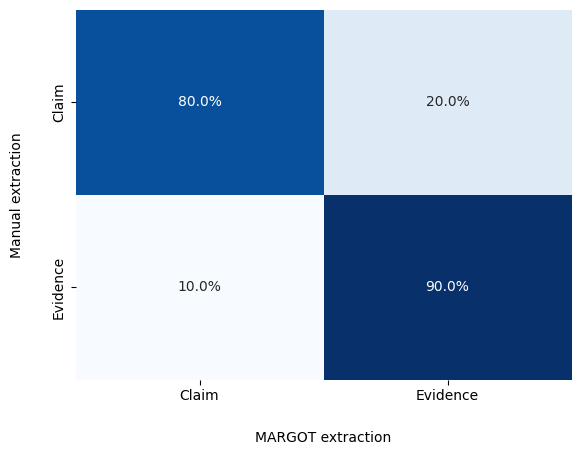

In [220]:
# Results manual annotations MARGOT
matrix_margot = np.array([
    [8, 2],
    [1, 9]
])




margot = sns.heatmap(matrix_margot/10, 
                 annot=True,
            fmt='.1%', 
            cmap='Blues',
            cbar=False)

margot.xaxis.set_ticklabels(['Claim', 'Evidence'])
margot.yaxis.set_ticklabels(['Claim', 'Evidence'])
margot.set_ylabel("Manual extraction", fontsize=10, labelpad=20)
margot.set_xlabel("MARGOT extraction", fontsize=10, labelpad=20)


Text(0.5, 23.52222222222222, 'Dolly extraction')

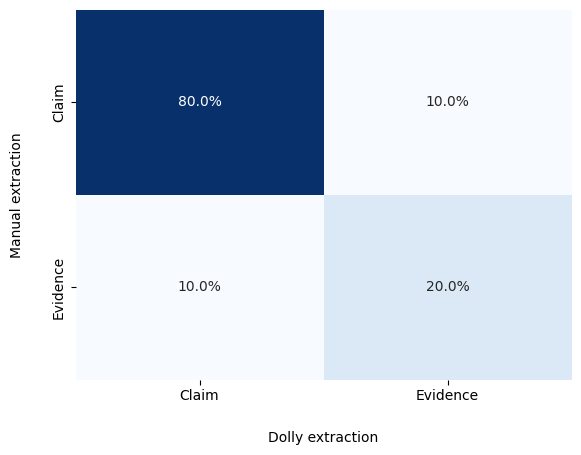

In [221]:

matrix_dolly = np.array([
    [8, 1],
    [1, 2]
])

dolly = sns.heatmap(matrix_dolly/10, 
                 annot=True,
            fmt='.1%', 
            cmap='Blues',
            cbar=False)

dolly.xaxis.set_ticklabels(['Claim', 'Evidence'])
dolly.yaxis.set_ticklabels(['Claim', 'Evidence'])
dolly.set_ylabel("Manual extraction", fontsize=10, labelpad=20)
dolly.set_xlabel("Dolly extraction", fontsize=10, labelpad=20)

In [238]:
# Results manual annotations MARGOT, Dolly separate


# Create a figure with two subplots
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first confusion matrix
# sns.heatmap(matrix_margot/10, annot=True, cmap="Blues", fmt=".1%", cbar=False, ax=axes[0])
# axes[0].set_xticklabels(labels)
# axes[0].set_yticklabels(labels)
# axes[0].set_xticks(np.arange(len(labels)) + 0.5)
# axes[0].set_yticks(np.arange(len(labels)) + 0.5)
# for i in range(len(labels)):
#     for j in range(len(labels)):
#         lab = f'{matrix_dolly[i, j] +"}
#         print(matrix_dolly[i, j])
#         axes[0].text(j + 0.5, i + 0.5, matrix_dolly[i, j],
#                      ha='center', va='center', color='black')
# axes[0].set_xlabel("Predicted")
# axes[0].set_ylabel("True")
# axes[0].set_title("Confusion Matrix 1")

# # Plot the second confusion matrix
# # sns.heatmap(matrix_margot/10, annot=True, cmap="Blues", fmt=".1%", cbar=False, ax=axes[1])
# # axes[1].set_xticklabels(labels)
# # axes[1].set_yticklabels(labels)
# # axes[1].set_xticks(np.arange(len(labels)) + 0.5)
# # axes[1].set_yticks(np.arange(len(labels)) + 0.5)
# # # for i in range(len(labels)):
# # #     for j in range(len(labels)):
# # #         axes[1].text(j + 0.5, i + 0.5, matrix_dolly[i, j],
# # #                      ha='center', va='center', color='black')
# # axes[1].set_xlabel("Predicted")
# # axes[1].set_ylabel("True")
# # axes[1].set_title("Confusion Matrix 2")

# # # Adjust the spacing between subplots
# # plt.tight_layout()

# # # Show the plot
# plt.show()


# # matrix_dolly = np.array([
# #     [8, 1],
# #     [1, 2]
# # ])

# # dolly = sns.heatmap(matrix_dolly/10, 
# #                  annot=True,
# #             fmt='.1%', 
# #             cmap='Blues',
# #             cbar=False)

# # dolly.xaxis.set_ticklabels(['Claim', 'Evidence'])
# # dolly.yaxis.set_ticklabels(['Claim', 'Evidence'])
# # dolly.set_ylabel("Manual extraction", fontsize=10, labelpad=20)
# # dolly.set_xlabel("Dolly extraction", fontsize=10, labelpad=20)

SyntaxError: EOL while scanning string literal (3701291857.py, line 26)

In [257]:
matrix_margot = np.array([
    [8, 2],
    [1, 9]
])

# Results Dolly
matrix_dolly = np.array([
    [8, 1],
    [1, 2]
])

matrix_dolly = matrix_dolly / 10 * 100
matrix_margot = matrix_margot / 10 * 100

80.0
10.0
10.0
20.0


Text(33.22222222222222, 0.5, 'Manual extraction')

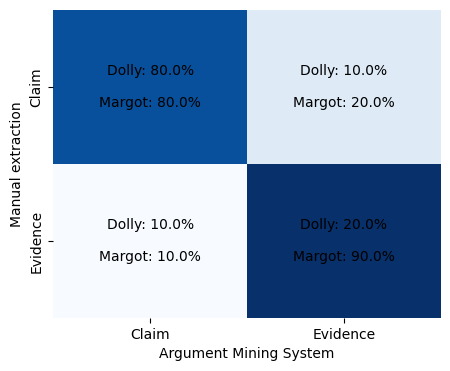

In [266]:
labels = ['Claim', 'Evidence']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(5, 4))

# Plot the first confusion matrix
sns.heatmap(matrix_margot/10, annot=False, cmap="Blues", fmt=".1%", cbar=False, ax=axes)
axes.set_xticklabels(labels)
axes.set_yticklabels(labels)
axes.set_xticks(np.arange(len(labels)) + 0.5)
axes.set_yticks(np.arange(len(labels)) + 0.5)
for i in range(len(labels)):
    for j in range(len(labels)):
        lab = f'Dolly: {matrix_dolly[i, j]}%\n\nMargot: {matrix_margot[i, j]}%'
        print(matrix_dolly[i, j])
        axes.text(j + 0.5, i + 0.5, lab,
                     ha='center', va='center', color='black')
axes.set_xlabel("Argument Mining System")
axes.set_ylabel("Manual extraction")
